# PAUTA
# Tarea 2: Estadística para Data Science

Se puede trabajar de manera individual o en grupos de máximo 4 personas. Si trabajas en grupo, igualmente debes entregar la tarea en el buzón de manera individual con tu nombre y los nombres de los otros integrantes del grupo.

En esta tarea vamos a explorar como un estadístico de una muestra aleatoria de datos puede servir como un estimador puntual de un parámetro de una población. Vamos a formar una distribución de muestreo de nuestro estimador y vamos a ir aprendiendo sobre sus propiedades.


## Dataset: Real estate en Ames, Iowa

Vamos a cargar nuestro primer dataset, el detalle de cada transacción de venta de propiedades residenciales en la ciudad de Ames, que fueron registradas entre el 2006 y el 2010. Este set de datos censal va a representar nuestra población de interés. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df_url = 'https://raw.githubusercontent.com/vmlandae/datasets_eds/main/clase4/ames.csv'

ames = pd.read_csv(df_url)

Veamos las primeras filas de este dataset

In [3]:
ames.head()

,Order,PID,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


Vemos que este dataset tiene muchas variables, con los cuales se podrían hacer análisis muy detallados. Para esta tarea, vamos a tomar en cuenta solo algunas variables: El área habitable construida de la casa sobre el suelo en pies cuadrados (`Gr.Liv.Area`), el precio de venta (`SalePrice`), el area del terreno (`Lot.Area`) y la calidad y condición del sistema de calefacción (`Heating.QC`). Creamos un dataframe con estas columnas:

In [4]:
df = ames[['Gr.Liv.Area','SalePrice','Lot.Area','Heating.QC']]

Y vemos algunas estadísticas descriptivas para cada variable ocupando el método `describe()` y el método `value_counts()`.

In [5]:
df.describe()

,Gr.Liv.Area,SalePrice,Lot.Area
count,2930.000000,2930.000000,2930.000000
mean,1499.690444,180796.060068,10147.921843
std,505.508887,79886.692357,7880.017759
min,334.000000,12789.000000,1300.000000
25%,1126.000000,129500.000000,7440.250000
50%,1442.000000,160000.000000,9436.500000
75%,1742.750000,213500.000000,11555.250000
max,5642.000000,755000.000000,215245.000000


In [6]:
df['Heating.QC'].value_counts()

Ex    1495
TA     864
Gd     476
Fa      92
Po       3
Name: Heating.QC, dtype: int64

En la variable `Heating.QC`, cada categoría corresponde a lo siguiente:

Ex: Excellent

Gd: Good

TA: Average/Typical

Fa: Fair

Po: Poor

Varias columnas tienen puntos, con lo cual no podemos acceder a una columna ocupando la notación `dataframe.columna`. Vamos a crear una variable `area` aparte del dataframe `df`, la cual será una conversión a metros cuadrados de la variable `Gr.Liv.Area`. En términos métricos un pie cuadrado es un cuadrado de lado 0.3048 metros de largo. Por tanto

In [7]:
sqft_to_sqmt = 0.3048*0.3048
print(sqft_to_sqmt)

0.09290304


Creamos la variable `area` que será el área habitable de las casas de esta población, medida en metros cuadrados.

In [8]:

area = df['Gr.Liv.Area']*sqft_to_sqmt
area

0       153.847434
1        83.241124
2       123.468140
3       196.025414
4       151.339052
           ...    
2925     93.181749
2926     83.798542
2927     90.115949
2928    129.042323
2929    185.806080
Name: Gr.Liv.Area, Length: 2930, dtype: float64

Veamos ahora la distribución del área habitable en nuestra población de casas haciendo un histograma

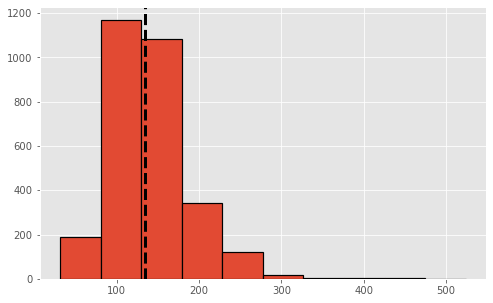

In [9]:
# Histograma del área habitable

# plt.style.use es para cambiar el estilo del gráfico, 
# se puede ver una referencia acá: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot') # ggplot es un paquete de gráficos muy popular en R.

# acá podemos variar el tamaño de la figura: (ancho,alto) 
plt.rcParams['figure.figsize'] = (8,5)

plt.hist(area, edgecolor = 'black', linewidth = 1.2)

# plt.axvline grafica una línea vertical, en este caso en la mediana del área
plt.axvline(area.median(), color='black', linestyle='dashed', linewidth=3)
plt.show()



## Pregunta 1:

a) Grafica otro histograma de la variable `area`, de dimensiones (12,5), con columnas de color verde, con 30 bins y en un estilo de la página fivethirtyeight, agregando además de la línea vertical de la mediana otra línea vertical para el promedio, de color rojo y con estilo 'dotted'.

## Respuesta
### 1. a)

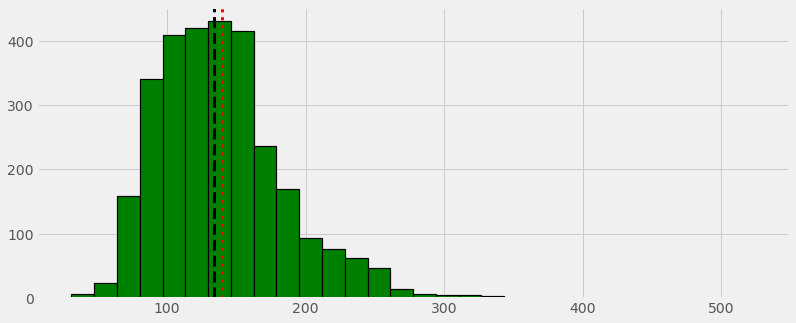

In [10]:
# Histograma del área habitable

# plt.style.use es para cambiar el estilo del gráfico, 
plt.style.use('fivethirtyeight')
# Estilo fivethirtyeight, una web famosa de análisis de datos y predicciones
# en ámbitos deportivos y políticos entre otros.

# tamaño de la figura
plt.rcParams['figure.figsize'] = (12,5)

plt.hist(area, edgecolor = 'black', linewidth = 1.2, bins = 30, color= "green" )

# plt.axvline grafica una línea vertical, en este caso en la mediana del área
plt.axvline(area.median(), color='black', linestyle='dashed', linewidth=3)
plt.axvline(area.mean(), color='red', linestyle='dotted', linewidth=3)
plt.show()

b) Describe esta distribución de población, calculando sus estadísticas descriptivas y comentando sobre el skewness de la distribución. 

## Respuesta 
### 1. b)

In [11]:
# Calculando estadísticas descriptivas
print('Estadística Descriptiva para la variable Area')
print(area.describe())
print('')
print('Skewness para la variable Area')
print(area.skew())

Estadística Descriptiva para la variable Area
count    2930.000000
mean      139.325801
std        46.963312
min        31.029615
25%       104.608823
50%       133.966184
75%       161.906773
max       524.158952
Name: Gr.Liv.Area, dtype: float64

Skewness para la variable Area
1.2741097164955077


**Respuesta:**

La distribución de la variable Area es unimodal, tiene un promedio de 139.33 metros cuadrados aproximadamente y una desviación estándar de 46.96 metros cuadrados aproximadamente, es asimétrica y está "sesgada a la derecha" (*right skewed*, skewness = 1.274), y tiene algunos *outliers* hacia el lado derecho, con un máximo de 524.16 metros cuadrados.


## La distribución de muestreo desconocida

En este dataset tenemos acceso a un censo de la población objetivo, pero esto es más bien escaso en la vida real, donde recolectar información de toda la población es habitualmente o muy caro o sencillamente imposible. Dado esto, usualmente tomamos una muestra de la población y la usamos para estudiar las propiedades de esta población.

Para tomar un muestreo, Pandas tiene un método llamado sample (documentación [acá](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) ). Tomemos una muestra de 50 casas vendidas.

In [12]:
samp1 = area.sample(n = 50,replace=False)
samp1.describe()

count     50.000000
mean     143.786035
std       56.091491
min       58.528915
25%      102.564956
50%      129.506838
75%      169.780306
max      286.698781
Name: Gr.Liv.Area, dtype: float64

Este comando recolecta una muestra aleatoria simple, sin reemplazo, de la variable `area`, y es asignada a la variable `samp1`. Esto es equivalenta a si fuéramos a la oficina de la ciudad y sacáramos al azar cincuenta archivos de venta.

OJO: cada vez que ejecutamos el método sample, se toma una nueva muestra. Por ejemplo:

In [13]:
print(area.sample(50).mean())
print(area.sample(50).mean())
print(area.sample(50).mean())
print(area.sample(50).mean())

138.2824589184
141.97070960639996
145.40254790399996
146.13276579840002


Para que se ocupe la misma "semilla" y se genere la misma muestra al ejecutar nuevamente el mismo comando, podemos utilizar el argumento `random_state` con un número o parámetro fijo cualquiera. 

In [14]:
# Por ejemplo, Fijamos random_state=10, y el promedio de este muestreo será 137.197 
# siempre que ejecutemos este comando

print(area.sample(50,random_state=10).mean())

print(area.sample(50,random_state=10).mean())

# Ahora random_state=12, y el promedio es 128.901

print(area.sample(50,random_state=12).mean())

print(area.sample(50,random_state=12).mean())


137.1973514112
137.1973514112
128.9011099392
128.9011099392


## Pregunta 2:
Haz un nuevo muestreo con n=50 y random_state=5 que se llame `sample_area_rs5`. Describe la distribución de la  muestra. ¿Cómo se compara con la distribución de la población? 


## Respuesta
### 2. 

In [15]:
# muestreo con n=50 y random_state=5
sample_area_rs5 = area.sample(50,random_state=5)

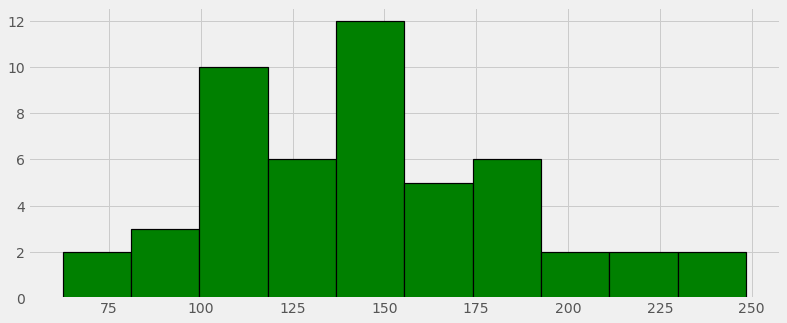

In [16]:
# histograma de la distribución (para visualizar mejor la distribución)

plt.hist(sample_area_rs5, edgecolor = 'black', linewidth = 1.2, bins = 10, color= "green" )
plt.show()

In [17]:
# Calculando estadísticas descriptivas
print('Estadística Descriptiva para la variable sample_area_rs5')
print(sample_area_rs5.describe())
print('')
print('Skewness para la variable sample_area_rs5')
print(sample_area_rs5.skew())

Estadística Descriptiva para la variable sample_area_rs5
count     50.000000
mean     145.021645
std       41.508998
min       62.430843
25%      115.594608
50%      141.444878
75%      171.336432
max      248.422729
Name: Gr.Liv.Area, dtype: float64

Skewness para la variable sample_area_rs5
0.38262843270970565


In [18]:
# comparación con parámetros de la población:
compara = pd.DataFrame({'describe_poblacion': area.describe(), 'describe_sample_area_rs5': sample_area_rs5.describe() } ) 
compara

,describe_poblacion,describe_sample_area_rs5
count,2930.000000,50.000000
mean,139.325801,145.021645
std,46.963312,41.508998
min,31.029615,62.430843
25%,104.608823,115.594608
50%,133.966184,141.444878
75%,161.906773,171.336432
max,524.158952,248.422729


**Respuesta:**

* La distribución de la variable `sample_area_rs5` es unimodal, tiene un promedio de 145 metros cuadrados aproximadamente y una desviación estándar de 41.51 metros cuadrados aproximadamente, es levemente asimétrica "sesgada a la derecha" (*right skewed*, skewness=0.383), y tiene algunos *outliers* hacia el lado derecho, con un máximo de 248.42 metros cuadrados.
* Comparado con la distribución de la población, la forma es más o menos similar, el promedio es un poco más alto que el promedio de la población y el skewness es menor, pero en la misma dirección.


Si queremos estimar el área habitable promedio de las casas vendidas en Ames usando la muestra, nuestra mejor conjetura es la media muestral. 

Dependiendo del muestreo seleccionado, el estimador podría estar un poco más arriba o más abajo del valor real de la media de la población de 139.33 metros cuadrados.

## Pregunta 3

Toma una segunda muestra, también de tamaño 50 y llámala `samp2`.¿Cómo se compara la media de `samp2`con la media de `samp1`, con la media de `sample_area_rs5` y con la media poblacional de `area`? 

In [19]:
# Respuesta

# samp2
samp2 = area.sample(50)

In [20]:
print('Media de samp2:',samp2.mean())
print('Media de samp1:',samp1.mean())
print('Media de sample_area_rs5:',sample_area_rs5.mean())
print('Media poblacional de área:',area.mean())

Media de samp2: 136.00633443840002
Media de samp1: 143.78603500800003
Media de sample_area_rs5: 145.02164544000007
Media poblacional de área: 139.32580127737882


**Respuesta:**

Todas las medias de muestras están relativamente cerca de la media poblacional del area.



Cada vez que tomamos una nueva muestra aleatoria obtenemos una media muestral distinta. Es útil tener una idea de cuánta variabilidad deberíamos esperar al estimar la media de la población de esta manera. La distribución de las medias muestrales, denominada *distribución muestral*, puede ayudarnos a comprender esta variabilidad. Como en este dataset tenemos acceso a los datos de la población, podemos construir una distribución muestral repitiendo los pasos anteriores muchas veces. Vamos a generar 10000 muestreos y vamos a calcular la media muestral para cada uno de ellos.

Vamos a usar un `for` loop pra generar 2000 muestreos de las áreas de 50 casas, calculando la media de cada muestreo y almacenándolo en una variable llamada `sample_means50`.

In [21]:
sample_means50 = [area.sample(50).mean() for i in range(0, 2000)]

Ojo, al hacer este for loop de esta forma, la variable `sample_means50` es un objeto de tipo `list`.

In [22]:
type(sample_means50)

list

Por tanto, si queremos ocupar un método de Pandas con esta lista, como por ejemplo `describe`, no me funcionará.

In [23]:
# sample_means50.describe()

Si quisiera ocupar el método `describe`, tendría que crear un nuevo objeto en Pandas y luego aplicar el método `describe` sobre ese objeto.

In [24]:
sm50 = pd.Series(sample_means50)
type(sm50)

pandas.core.series.Series

In [25]:
sm50.describe()

count    2000.000000
mean      139.314406
std         6.586177
min       121.147422
25%       134.630905
50%       139.081425
75%       143.873828
max       160.350647
dtype: float64

Ahora, graficamos un histograma para esta nueva variable `sm50`

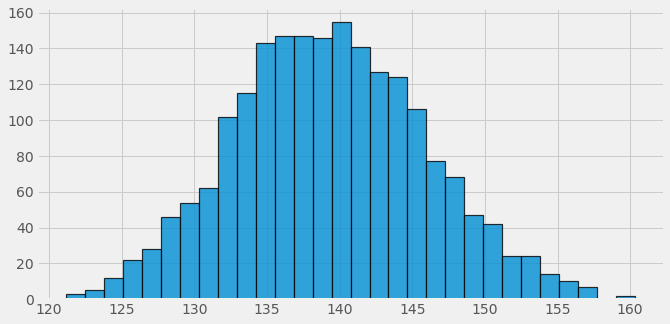

In [26]:
plt.rcParams['figure.figsize'] = (10,5)
plt.hist(sm50, edgecolor = 'black', linewidth = 1.2, bins =30,alpha=0.8)
plt.show()

## Pregunta 4
¿Cuántos elementos tiene `sm50`? Ocupa el comando `describe` y describe la distribución.


In [27]:
# Respuesta

sm50.describe()


count    2000.000000
mean      139.314406
std         6.586177
min       121.147422
25%       134.630905
50%       139.081425
75%       143.873828
max       160.350647
dtype: float64

In [28]:
# comparación con parámetros de la población:
compara = pd.DataFrame({'describe_poblacion': area.describe(), 'describe_sm50': sm50.describe() } ) 
compara

,describe_poblacion,describe_sm50
count,2930.000000,2000.000000
mean,139.325801,139.314406
std,46.963312,6.586177
min,31.029615,121.147422
25%,104.608823,134.630905
50%,133.966184,139.081425
75%,161.906773,143.873828
max,524.158952,160.350647


**Respuesta:**
`sm50` tiene 2000 elementos, con un promedio muy muy cercano al de la población, una desviación estándar de aproximadamente poco más de 6 metros cuadrados, y como se aprecia en el gráfico, es aproximadamente simétrica y unimodal, con una forma que asemeja a una distribución normal.

## Pregunta 5
¿Qué pasaría con la distribución de muestreo si generamos 20000 muestreos de n=50?
Genera un nuevo vector llamado `sample_means50_20000` y conviértelo a una serie de pandas llamada `sm50_20000`,  Ocupa el comando `describe`, grafica un nuevo histograma y describe la nueva distribución. ¿Cómo se compara la distribución de `sm50_20000` con la de `sm50`?

In [29]:
# Respuesta

sample_means50_20000 = [area.sample(50).mean() for i in range(0, 20000)]

In [30]:
sm50_20000 = pd.Series(sample_means50_20000)

In [31]:

print(sm50_20000.describe())


count    20000.000000
mean       139.437125
std          6.573261
min        115.528646
25%        134.895214
50%        139.266302
75%        143.761880
max        166.720079
dtype: float64


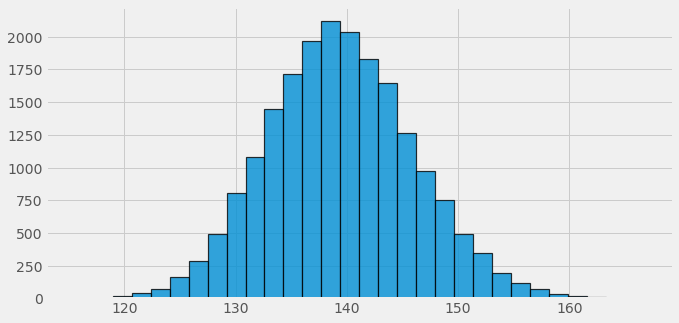

In [32]:
plt.hist(sm50_20000, edgecolor = 'black', linewidth = 1.2, bins =30,alpha=0.8)
plt.show()

In [33]:
# comparación sm50 con sm50_20000
compara = pd.DataFrame({'describe_sm50': sm50.describe(), 'describe_sm50_20000': sm50_20000.describe() } ) 
compara

,describe_sm50,describe_sm50_20000
count,2000.000000,20000.000000
mean,139.314406,139.437125
std,6.586177,6.573261
min,121.147422,115.528646
25%,134.630905,134.895214
50%,139.081425,139.266302
75%,143.873828,143.761880
max,160.350647,166.720079


**Respuesta:**

La distribución de `sm50_20000` es prácticamente igual en promedio, desviación estándar, mediana y rango intercuartil, comparada con `sm50`. La forma es muy similar, con la diferencia que los bordes en `sm50_20000` son más suaves, con una forma que asemeja de mejor manera a una distribución normal.

## Tamaño de la muestra y distribución de muestreo

Debido a que la media muestral es un estimador insesgado, la distribución de muestreo está centrada en el promedio de área habitable verdadero de la población, y la dispersión de la distribución nos indica cuánta variabilidad está inducida al hacer un muestreo de solo 50 ventas.

Para que tengamos una idea del efecto que el tamaño de la muestra tiene en nuestra distribución, construyamos tres muestreos más de distribuciones de muestreos: Una basada en un tamaño de muestra de 10, la otra con un tamaño de 100 y otra con un tamaño de 200.

In [34]:
sample_means10 = [area.sample(10).mean() for i in range(0, 2000)]
sample_means100 = [area.sample(100).mean() for i in range(0, 2000)]
sample_means200 = [area.sample(200).mean() for i in range(0, 2000)]

In [35]:
# convertimos a series de Pandas
sm10 = pd.Series(sample_means10)
sm100 = pd.Series(sample_means100)
sm200 = pd.Series(sample_means200)

Para ver el efecto que distintos tamaños de muestras tienen en la distribución de muestreo, graficamos las tres distribuciones una arriba de la otra

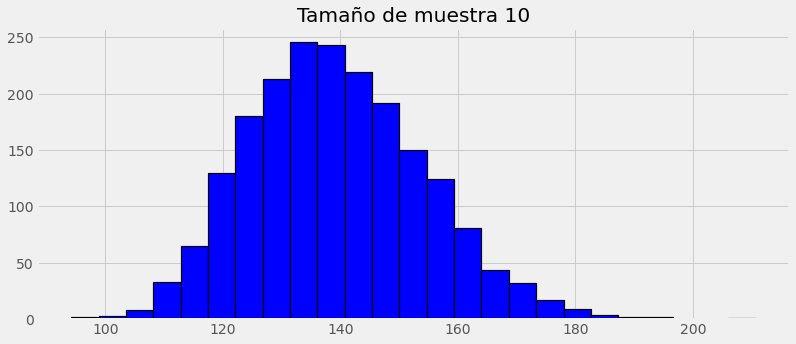

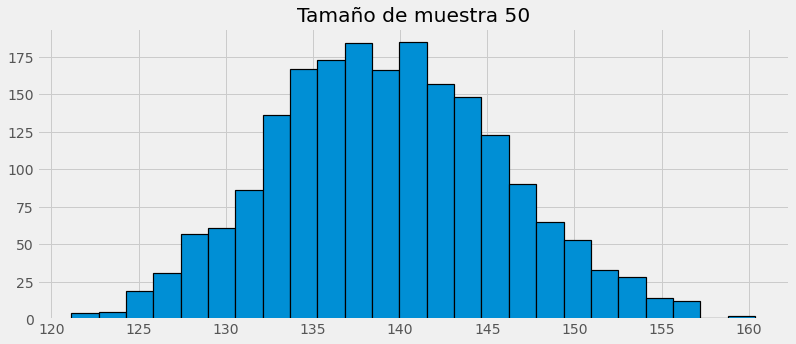

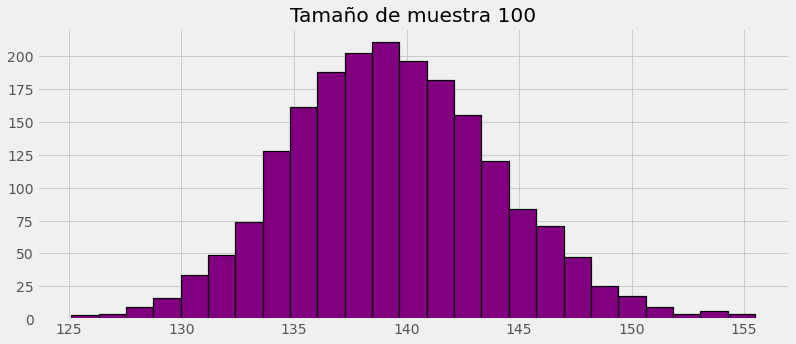

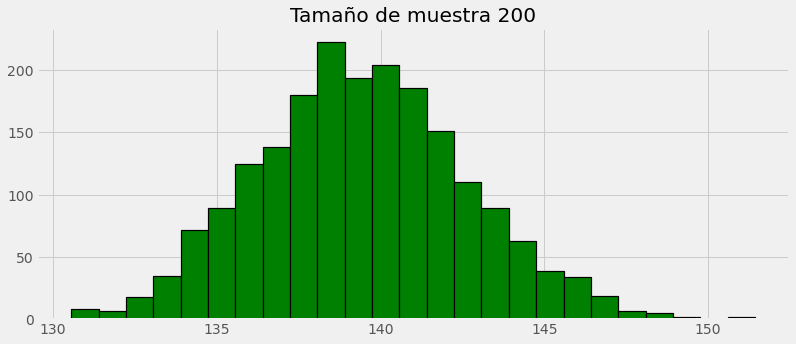

In [36]:
plt.rcParams['figure.figsize'] = (12,5)
plt.hist(sm10, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue')
plt.title("Tamaño de muestra 10")
plt.show()
plt.hist(sm50, edgecolor = 'black', linewidth = 1.2, bins = 25)
plt.title("Tamaño de muestra 50")
plt.show()
plt.hist(sm100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'purple')
plt.title("Tamaño de muestra 100")
plt.show()
plt.hist(sm200, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'green')
plt.title("Tamaño de muestra 200")
plt.show()

Cada gráfico tiene un rango distinto. Para poder hacer una mejor comparación, el rango del eje X debiera ser el mismo para todos los gráficos. Podemos hacer esto graficando todos los histogramas superpuestos, ocupando el argumento `alpha`.

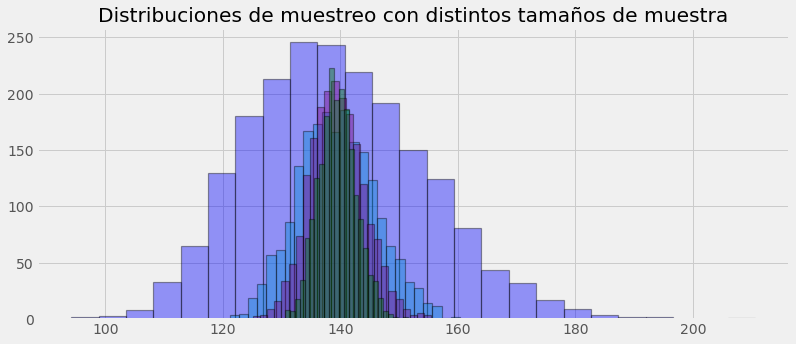

In [37]:
plt.rcParams['figure.figsize'] = (12,5)
plt.hist(sm10, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'blue',alpha=0.4)
plt.hist(sm50, edgecolor = 'black', linewidth = 1.2, bins = 25,alpha=0.4)
plt.hist(sm100, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'purple',alpha=0.4)
plt.hist(sm200, edgecolor = 'black', linewidth = 1.2, bins = 25, color = 'green',alpha=0.4)
plt.title("Distribuciones de muestreo con distintos tamaños de muestra")
plt.show()

## Pregunta 6
Cuando el tamaño de la muestra es más grande, ¿qué pasa con el centro? ¿Y con la dispersión?

**Respuesta:**

Cuando el tamaño de la muestra es más grande, el centro de la distribución se mueve levemente más cerca de la media poblacional (139.33 metros cuadrados), sin embargo es un efecto muy pequeño ya que las cuatro distribuciones de muestreo tienen medias parecidas.

El efecto del tamaño de la muestra es mucho mayor en la dispersión de las distribuciones de muestreo. A mayor tamaño de la muestra, la dispersión de la distribución decrece. 


In [38]:
# para apreciarlo mejor, podemos comparar estadística descriptiva de las cuatro distribuciones de muestreo:
compara = pd.DataFrame({'describe_sm10': sm10.describe(), 'describe_sm50': sm50.describe(),
                        'describe_sm100': sm100.describe(), 'describe_sm200': sm200.describe() } ) 
compara

,describe_sm10,describe_sm50,describe_sm100,describe_sm200
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,139.358782,139.314406,139.419251,139.454929
std,14.911024,6.586177,4.625163,3.191648
min,94.240844,121.147422,125.117169,130.562681
25%,128.854194,134.630905,136.210489,137.300706
50%,138.360497,139.081425,139.214276,139.384986
75%,148.944476,143.873828,142.414786,141.519898
max,210.536869,160.350647,155.474166,151.430562


## Pregunta 7
Hasta ahora trabajamos con el área promedio. Ahora, deberás tratar de estimar la media del precio de venta.

a) Toma un muestreo aleatorio de la variable `SalePrice` de tamaño 10. Usando esta muestra, ¿Cuál es tu estimación puntual de la media de la población? Toma otro muestreo de tamaño 150, y teniendo estos dos muestreos,  ¿Cuál sería tu estimación puntual de la media de la población?

In [39]:
# Respuesta
# muestreo aleatorio de SalePrice de tamaño 10
saleprice_sample10 =  df['SalePrice'].sample(10)

# Usando esta muestra, el estimador puntual de la media de la población es la media muestral, o sea
print('La estimación puntual de la media de la población,',
      'usando el promedio muestral de la variable SalePrice en el muestreo con tamaño n=10, es de:',
      saleprice_sample10.mean())

# muestreo aleatorio de SalePrice de tamaño 150
saleprice_sample150 =  df['SalePrice'].sample(150)

# Teniendo estos dos muestreos, el de n=150 es un mejor estimador puntual de la media poblacional 
#Usando esta muestra, el estimador puntual de la media de la población es la media muestral, o sea
print('Al tener ambos muestreos, la mejor estimación puntual de la media de la población', 
      'sería usando la media muestral de la variable SalePrice en el muestreo con tamaño n=150, el cual es:',
      saleprice_sample150.mean())




La estimación puntual de la media de la población, usando el promedio muestral de la variable SalePrice en el muestreo con tamaño n=10, es de: 154112.5
Al tener ambos muestreos, la mejor estimación puntual de la media de la población sería usando la media muestral de la variable SalePrice en el muestreo con tamaño n=150, el cual es: 187873.88


b) Usa un `for` loop como en las preguntas anteriores para generar 5000 muestreos de los precios de 150 casas, calculando la media de cada muestreo y almacenándolo en una variable llamada `sample_means150`.

In [40]:
# Respuesta

sample_means150 = [df['SalePrice'].sample(150).mean() for i in range(0, 5000)]


**Respuesta:**

c) Haz un histograma, describe la forma de esta distribución de muestreo y calcula el promedio de la variable `sample_means150`.  Compáralo con el promedio de la población real.

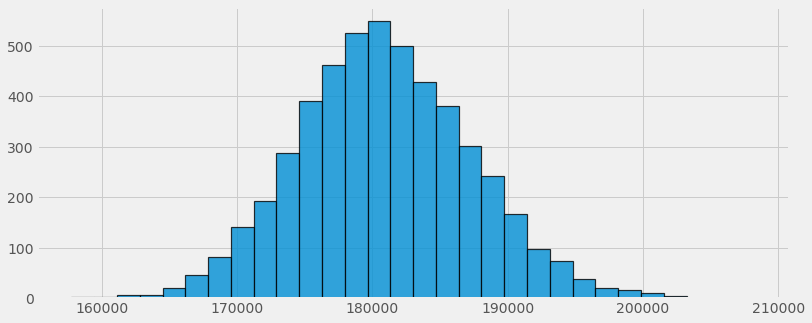

In [41]:
# Respuesta

# Histograma para sample_means150

plt.hist(sample_means150, edgecolor = 'black', linewidth = 1.2, bins =30,alpha=0.8)
plt.show()

In [42]:
# estadística descriptiva para la distribución de muestreo 
sm150 = pd.Series(sample_means150)
print(sm150.describe())



count      5000.000000
mean     180898.231416
std        6414.946866
min      157763.286667
25%      176604.328333
50%      180686.090000
75%      185129.563333
max      208266.206667
dtype: float64


In [43]:
# Cálculo de la media poblacional de la variable SalePrice.
print(df['SalePrice'].mean())


180796.0600682594


**Respuesta:**
La distribución de muestreo `sample_means150` tiene una forma simétrica y unimodal que asemeja a una distribución normal.

In [44]:
print('El promedio del precio de venta de la distribución de muestreo de tamaño n=150 es de ',sm150.mean())
print('El promedio poblacional del precio de venta es de ',df['SalePrice'].mean())
print('La diferencia entre ambas medias es de ',  df['SalePrice'].mean()- sm150.mean())

El promedio del precio de venta de la distribución de muestreo de tamaño n=150 es de  180898.2314160004
El promedio poblacional del precio de venta es de  180796.0600682594
La diferencia entre ambas medias es de  -102.1713477410085


## Pregunta 8: Correlaciones

a) Calcula la matriz de correlaciones entre las variables `Gr.Liv.Area`, `SalePrice`, `Lot.Area`.

In [45]:
# Respuesta

df.corr()



,Gr.Liv.Area,SalePrice,Lot.Area
Gr.Liv.Area,1.000000,0.706780,0.285599
SalePrice,0.706780,1.000000,0.266549
Lot.Area,0.285599,0.266549,1.000000


b) Comenta por qué sería esperable (o no) que el coeficiente de correlación entre el precio de venta y el área habitable es más grande que entre el precio de venta y el área del lote.

**Respuesta:**

En general, es esperable que tanto el área habitable como el área del lote estén correlacionados positivamente con el precio de venta de un lugar. Pero dentro de eso, es esperable que la correlación sea menor entre el precio de venta y el área del lote, ya que las propiedades en zonas de baja densidad o en zonas agrícolas tienden a tener un area del lote muchísimo más grande y un precio pequeño en relación a los lugares de alta densidad. En cambio, el área habitable es un factor importante en el precio que es más fuerte ya que a mayor área habitable, mayor precio, de manera independiente de la locación o uso de la propiedad. 

La idea de esta pregunta y la siguiente es hacer una "suposición basada en datos" que suene relativamente razonable y con las herramientas que tenemos, ahora, si alguien profundizó más, también está bien.


Creamos dos dataframes llamados `df_excellent` y `df_other`, que contienen a las ventas de casas con calefacción de calidad *Excellent* y del resto de las calidades respectivamente.

In [46]:
df_excellent = df[df['Heating.QC']=="Ex"]
df_excellent

,Gr.Liv.Area,SalePrice,Lot.Area,Heating.QC
3,2110,244000,11160,Ex
5,1604,195500,9978,Ex
6,1338,213500,4920,Ex
7,1280,191500,5005,Ex
8,1616,236500,5389,Ex
...,...,...,...,...
2909,1475,127000,2665,Ex
2911,874,126500,10172,Ex
2916,630,92000,1533,Ex
2924,1224,131000,20000,Ex


In [47]:
df_other = df[df['Heating.QC']!="Ex"]
df_other

,Gr.Liv.Area,SalePrice,Lot.Area,Heating.QC
0,1656,215000,31770,Fa
1,896,105000,11622,TA
2,1329,172000,14267,TA
4,1629,189900,13830,Gd
9,1804,189000,7500,Gd
...,...,...,...,...
2923,1126,160000,17400,Fa
2925,1003,142500,7937,TA
2926,902,131000,8885,TA
2927,970,132000,10441,TA


c) Calcula las matrices de correlación para ambos dataframes df_excellent y df_other, y comenta si los cambios en los coeficientes de correlación entre el precio de venta y el área habitable, y el precio de venta y el área del lote te hacen sentido y qué interpretación podría hacerse al respecto. 

In [48]:
## df_excellent

df_excellent.corr()


,Gr.Liv.Area,SalePrice,Lot.Area
Gr.Liv.Area,1.000000,0.710061,0.344207
SalePrice,0.710061,1.000000,0.278177
Lot.Area,0.344207,0.278177,1.000000


In [49]:
## df_other
df_other.corr()


,Gr.Liv.Area,SalePrice,Lot.Area
Gr.Liv.Area,1.000000,0.649399,0.259433
SalePrice,0.649399,1.000000,0.371505
Lot.Area,0.259433,0.371505,1.000000


**Respuesta:**
Los coeficientes de correlación entre el precio de venta y el área habitable son ambos positivos, y es más grande  para el dataframe que tiene solo propedades con calefacción en excelente estado(0.71) que para el dataframe que tiene las propiedades con la calefacción en otros estados (0.65). Los coeficientes de correlación entre el precio de venta y el área del lote son ambos positivos, y es más pequeño para las propiedades con calefacción en excelente estado (0.28) que para las propiedades con calefacción en otros estados (0.37).

Una interpretación que haría sentido con los cambios en los coeficientes de regresión podría ser la siguiente: 
Partiendo de la base que a priori, las propiedades con calefacción en excelente estado en general van a tender a tener un precio de venta más alto que las que no lo tienen. Asimismo, van a ser propiedades donde el estado y calidad de los lugares interiores (habitables) de la propiedad en general va a tender a ser mejor que en las propiedades donde la calidad de la calefacción es menor, cualidades que correlacionan también con un precio de venta más alto, y que son especialmente importantes para el tipo de comprador que está interesado en encontrar buena calidad en la parte construida habitable de la casa. Entonces, es razonable esperar que la correlación entre área habitable y precio de venta tenga una magnitud mayor en estas propiedades. En cambio, en las propiedades donde la calefacción no tiene calidad excelente, se espera en general una menor calidad de los lugares interiores y que los compradores tengan menos interés en la calidad de los espacios habitables de estos lugares, y le den más preponderancia a otras características como el área del lote. 